In [1]:
import glob
import skimage.io as io
import numpy as np
#import commonfunctions as cf
import sklearn
from skimage.feature import hog
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import pickle
import cv2
import random
import os

from PIL import Image, ImageEnhance



from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np

import argparse
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import *

import fast_glcm
from skimage import data

from sklearn.decomposition import PCA



/home/mohamed/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
'''
if you want to load the data again to work with them
'''

male_data=np.load('male_data.npy',allow_pickle=True)
female_data=np.load('female_data.npy',allow_pickle=True)

(133,)


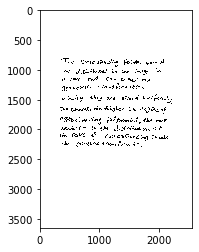

In [3]:
print(female_data.shape)
plt.imshow(male_data[0],cmap='gray')

In [11]:
for i,img in enumerate(male_data):
    
    print(img.shape)
    # temp=cv2.resize(img,wshape)
    # plt.imshow(temp,cmap='gray')
    # cv2.imshow()
    if(i== 2):
        break


(3652, 2565)
(2984, 2096)
(3700, 2648)


In [ ]:
for i,img in enumerate(female_data):
    k=5
    wshape=(2700,1900)

    female_data[i]=cv2.resize(img,wshape)

In [ ]:


glcm_male=[]
glcm_female=[]

for i,img in enumerate(male_data):
    try:
        temp=np.array(fast_glcm.fast_glcm_mean(img))
        temp=temp.flatten()
        glcm_male.append(temp)
        
    except :
        print(i)


In [ ]:

# np.save("glcm_male.npy",glcm_male)

In [ ]:

for i,img in enumerate(female_data):
    try:
        temp=np.array(fast_glcm.fast_glcm_mean(img))
        temp=temp.flatten()
        glcm_female.append(temp)
        
    except:
        print(i)

glcm_male=np.array(glcm_male)
glcm_female=np.array(glcm_female)

In [ ]:
# np.save("glcm_male.npy",glcm_male)
# np.save("glcm_female.npy",glcm_female)


In [ ]:
'''
if you want to load the data again to work with them
'''

glcm_male=np.load('glcm_male.npy',allow_pickle=True)
glcm_female=np.load('glcm_female.npy',allow_pickle=True)


In [ ]:
pca=PCA(n_components=100)
glcm_male=pca.fit_transform(glcm_male)
# X_pca=pca.fit_transform(X)

In [ ]:
pca=PCA(n_components=100)
glcm_female=pca.fit_transform(glcm_female)
# X_pca=pca.fit_transform(X)

In [ ]:
print(glcm_female.shape)

In [ ]:

X=np.concatenate((glcm_male,glcm_female),axis=0)

Y=np.concatenate((np.ones(glcm_male.shape[0]),
                np.zeros(glcm_female.shape[0])),
                axis=0)

In [ ]:
print(glcm_male.shape[0],glcm_female.shape[0])

In [ ]:
X,Y=sklearn.utils.shuffle(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 70% training and 30% test


In [ ]:
clf = svm.SVC(kernel='rbf', verbose=True, C=10)

clf.fit(X_train, y_train)


In [ ]:

y_pred = clf.predict(X_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))